In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/A_Z Handwritten Data.csv")


In [4]:
print(df.shape)
df[0:5]

(372450, 785)


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
#rename our label column and find out how many unique values that col cantains
df.rename(columns={'0' : 'outcome'}, inplace=True)
print("No of Unique Values : ", df["outcome"].nunique())
df.head()


No of Unique Values :  26


,outcome,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
X = df.drop("outcome", axis=1)
y = df["outcome"].values

In [7]:
print("Shape of X : ", X.shape)
print("Shape of Outcome Column", y.shape)


Shape of X :  (372450, 784)
Shape of Outcome Column (372450,)


In [8]:
#reshape our columns to 28*28 shape for model
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
train_X = np.reshape(train_X.values, (train_X.shape[0], 28, 28, 1) )
test_X = np.reshape(test_X.values, (test_X.shape[0], 28, 28, 1))

In [9]:
print("TrainData shape", train_X.shape)
print("TestData shape", test_X.shape)

TrainData shape (297960, 28, 28, 1)
TestData shape (74490, 28, 28, 1)


In [10]:
#convert our label into categorical value because we get output from model as a vector of different probabilities.
train_y = to_categorical(train_y, num_classes=26, dtype=int)
test_y = to_categorical(test_y, num_classes=26, dtype=int)


In [11]:
print("train_y",train_y.shape)
print("test_y",test_y.shape)

train_y (297960, 26)
test_y (74490, 26)


In [12]:
digit_char_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',
                     16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

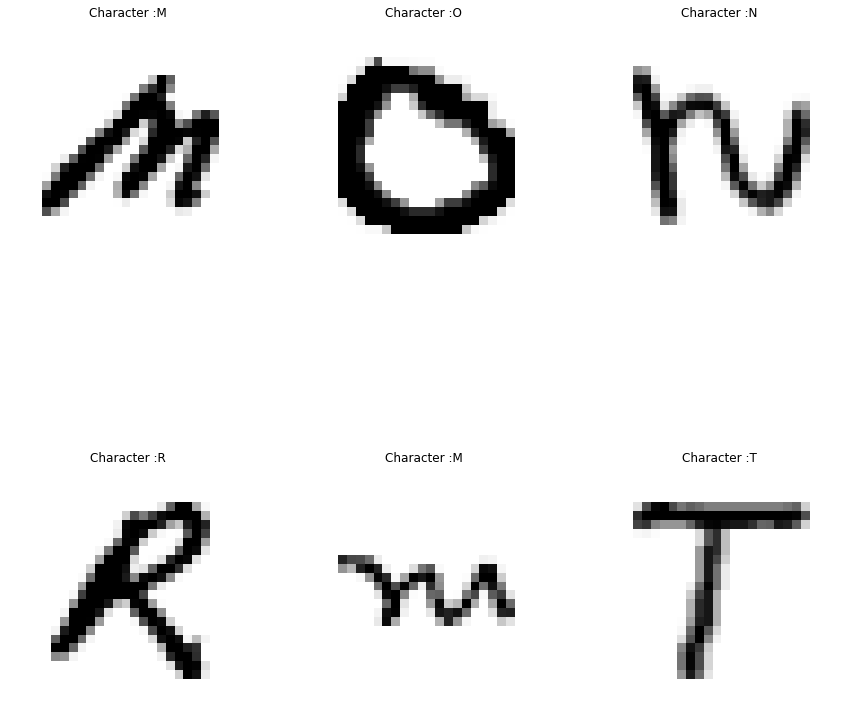

In [13]:
#plot some images 
#Shuffle some of the images of train data set and present image in thresold

shuff_images = shuffle(train_X[:50], random_state=1)
train_y_shuff = shuffle(train_y[:50], random_state=1)
fig, ax = plt.subplots(2,3, figsize = (15,15))
for i,axis in enumerate(ax.flat):
    axis.imshow(shuff_images[i].reshape(28,28), cmap="Greys")
    axis.axis("off")
    axis.set(title = f"Character :{digit_char_dict[train_y_shuff[i].argmax()]} ")

In [14]:
#Count the frequency of each alphabet in the dataset to avoid overfitting

yOHE = to_categorical(y, num_classes=26, dtype=int)
chars = []
for i in range(y.shape[0]):
  chars.append(digit_char_dict[yOHE[i].argmax()])
char_freq_dict = {}
for i in chars:
    char_freq_dict[i] = char_freq_dict.get(i,0) + 1          #char_freq_dict[i] = chars.count(i)  
char_freq_dict


{'A': 13869,
 'B': 8668,
 'C': 23409,
 'D': 10134,
 'E': 11440,
 'F': 1163,
 'G': 5762,
 'H': 7218,
 'I': 1120,
 'J': 8493,
 'K': 5603,
 'L': 11586,
 'M': 12336,
 'N': 19010,
 'O': 57825,
 'P': 19341,
 'Q': 5812,
 'R': 11566,
 'S': 48419,
 'T': 22495,
 'U': 29008,
 'V': 4182,
 'W': 10784,
 'X': 6272,
 'Y': 10859,
 'Z': 6076}

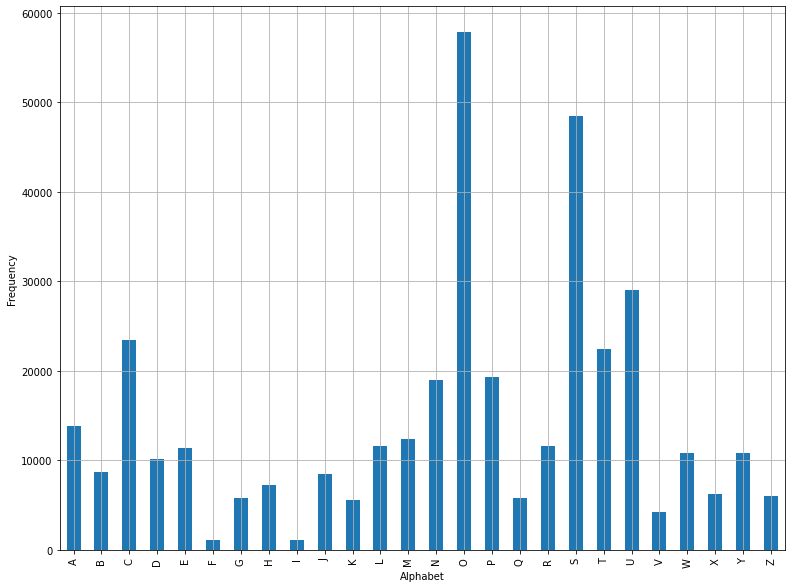

In [15]:
d1 = df.copy()
d1["outcome"] = d1["outcome"].map(digit_char_dict)
# d1.groupby("outcome").

freq = d1.groupby("outcome").size()
freq.plot.bar(figsize = (13,10))
plt.xlabel("Alphabet")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [16]:
#model building : 
#Three Conv2D layers followed by MaxPool2D
#Two Dense Layers
#Output Layes
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Conv2D(128, kernel_size=(3,3), activation="relu", padding="valid"))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Flatten())

model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))

model.add(Dense(26, activation="softmax")) #26 letters so we get 1-D vector 



In [17]:
# model.compile(optimizer = Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
# import time
# start = time.time()
# md = model.fit(train_X, train_y, epochs=1, validation_data=(test_X, test_y))
# end = time.time()
# print(f'Execution Time :{round((end-start)/60,3)} minutes')


In [18]:
#Save the Model
# model.summary()
# model.save(r'model.h5')

In [19]:
#Retrieve the Model
model.load_weights("model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
model.compile(optimizer = Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
scores = model.evaluate(test_X, test_y, verbose=0)


print('Validation Loss : {: .2f}%'.format(scores[0]*100))
print('Validation Accuracy: {: .2f}%'.format(scores[1]*100))



Loaded model from disk
Validation Loss :  7.81%
Validation Accuracy:  97.78%


In [21]:
# best model accuracy
# best_model_accuracy = md.history['accuracy'][argmin(md.history['loss'])]

# print("The validation accuracy is :", md.history['val_accuracy'])
# print("The training accuracy is :", md.history['accuracy'])
# print("The validation loss is :", md.history['val_loss'])
# print("The training loss is :", md.history['loss'])

In [ ]:
#plotting the validation loss and training loss

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,10))

ax1.plot(md.history["loss"])
ax1.plot(md.history["val_loss"])
ax1.set_xlabel("Epochs")
ax1.set_title("LOSS")
ax1.legend(["training, validation"])

ax2.plot(md.history["accuracy"])
ax2.plot(md.history["val_accuracy"])
ax2.set_xlabel("Epochs")
ax2.set_title("ACCURACY")
ax2.legend(["training, validation"])



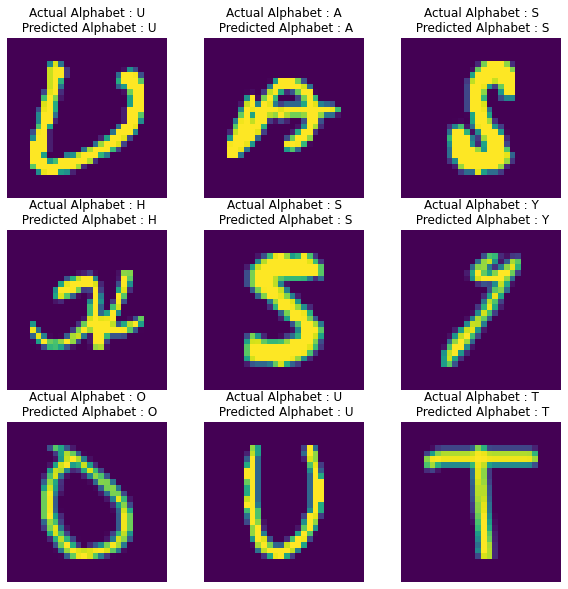

In [23]:
# Plot the predictions and actual alphabet
preds = model.predict(test_X)
X_test_temp = test_X.reshape(test_X.shape[0], 28, 28)
fig, axis = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test_temp[i])
    ax.axis('off')
    ax.set(title = f"Actual Alphabet : {digit_char_dict[test_y[i].argmax()]}\n Predicted Alphabet : {digit_char_dict[preds[i].argmax()]}");


In [24]:
#create dataframe and save csv file

pred_chars = [digit_char_dict[i.argmax()]for i in preds]
actual_chars = [digit_char_dict[j.argmax()]for j in test_y]

data = pd.DataFrame({"Predicted_Character":pred_chars, "Actual_Character":actual_chars})

# save to a csv file 
data.to_csv('result.csv', index=False)
print(" Result saved successfully")

data.head()

 Result saved successfully


,Predicted_Character,Actual_Character
0,U,U
1,A,A
2,S,S
3,H,H
4,S,S


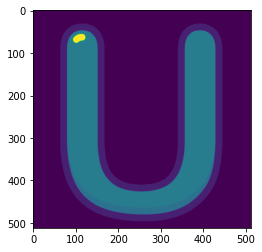

In [73]:
#Model prediction on User Image(External Images)
import cv2
img=cv2.imread(r"/content/drive/MyDrive/Colab Notebooks/umang.png")
copy_img = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
copy_img = cv2.GaussianBlur(copy_img, (7,7), 0)
gray_img = cv2.cvtColor(copy_img, cv2.COLOR_BGR2GRAY)
(thresh, blackAndWhiteImage) = cv2.threshold(gray_img, 100, 255, cv2.THRESH_BINARY_INV)
print(blackAndWhiteImage.shape)
final_img = cv2.resize(blackAndWhiteImage, (28,28))
plt.imshow(final_img)
print(final_img.shape)
final_img = np.reshape(final_img, (1,28,28,1))



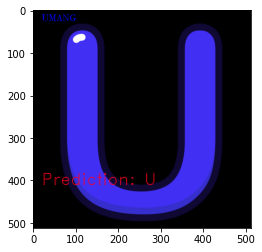

In [72]:
img_pred = digit_char_dict[np.argmax(model.predict(final_img))]

cv2.putText(img, "UMANG ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
plt.imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()